In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_excel('beachfronthotels.xlsx')

In [5]:
df.head()

,Hotel,Overall,Comfort,Amenities,In-House Dining
0,Muri Beach Odyssey,94.3,94.5,90.8,97.7
1,Pattaya Resort,92.9,96.6,84.1,96.6
2,Sojourner’s Respite,92.8,99.9,100.0,88.4
3,Spa Carribe,91.2,88.5,94.7,97.0
4,Penang Resort and Spa,90.4,95.0,87.8,91.1


<AxesSubplot:>

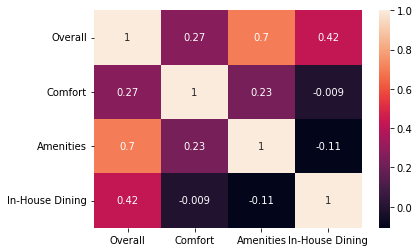

In [20]:
sns.heatmap(df.corr(), annot=True)

In [60]:
inputs = df[['Comfort','Amenities', 'In-House Dining']]
#removed 'comfort' from inputs since it did not pass t test
targets = df.Overall

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)



In [61]:
def rms(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [62]:
rms(targets, predictions)

1.241351618639762

In [63]:
model.coef_

array([0.10934853, 0.244268  , 0.2474312 ])

In [64]:
model.intercept_

35.69673648215492

In [15]:
df.shape

(20, 5)

In [16]:
dof = 16

In [17]:
stats.t.isf(.01/2, dof)

2.9207816223499976

In [65]:
sm_inputs = sm.add_constant(inputs)

In [66]:
model_sum = sm.OLS(targets, sm_inputs).fit().summary()

In [67]:
model_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     15.98
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.52e-05
Time:                        06:41:51   Log-Likelihood:                -32.703
No. Observations:                  20   AIC:                             73.41
Df Residuals:                      16   BIC:                             77.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.6967     13.215      2.701      0.016       7.681      63.712
Comfort             0.1093      0.130      0.843      0.412      -0.166       0.384
Amenities           0.2443      0.043      5.639      0.000       0.152       0.336
In-House Dining     0.2474      0.062      3.983      0.001       0.116       0.379
==============================================================================
Omnibus:                        0.710   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.664
Skew:                          -0.093   Prob(JB):                        0.718
Kurtosis:                       2.127   Cond. No.                     6.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""